100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 120.37it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.50      0.60      0.55         5

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


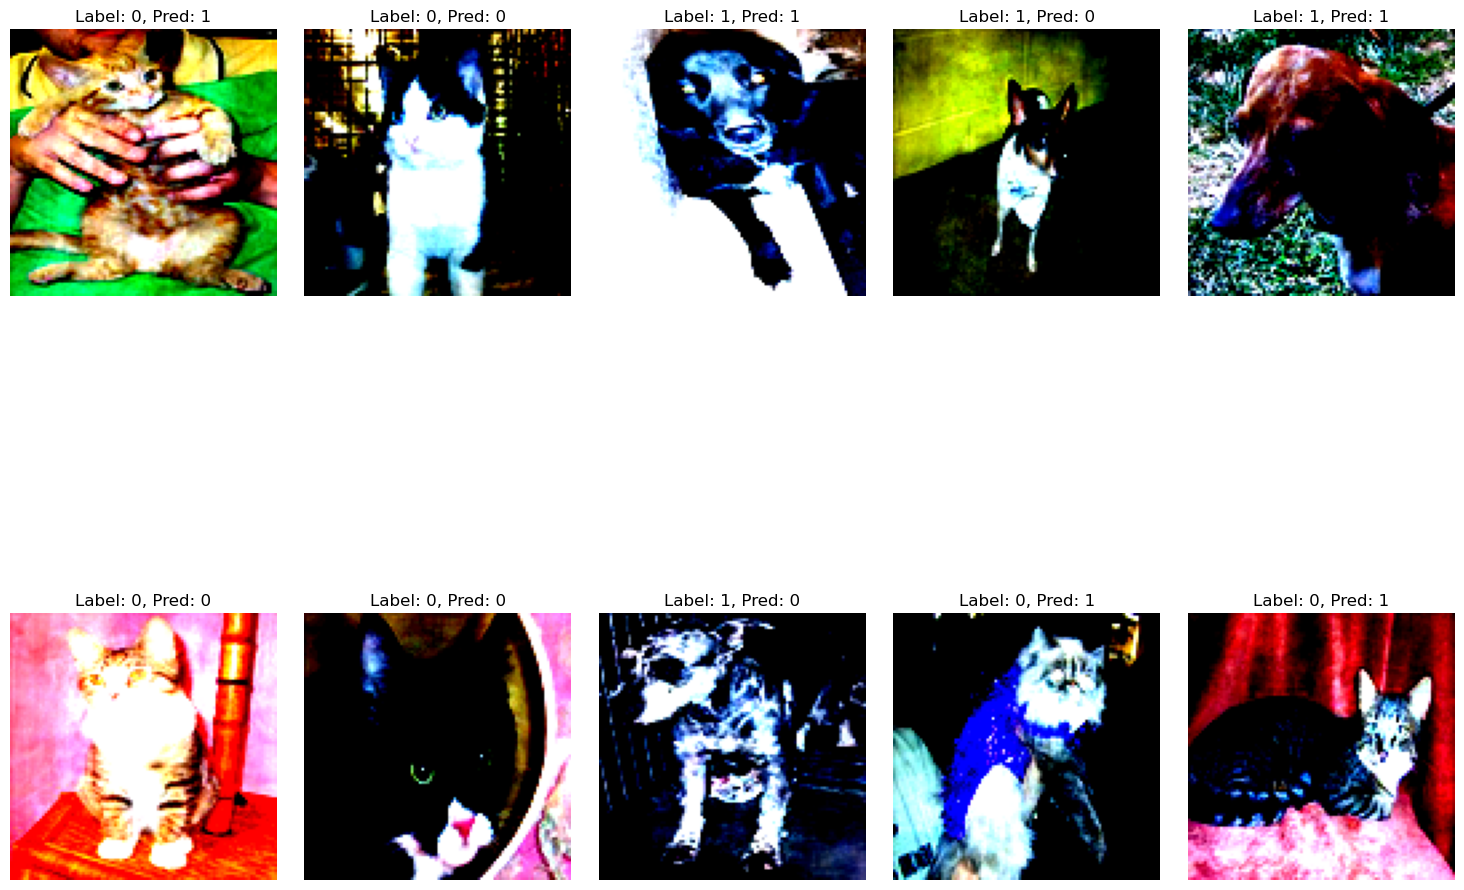

In [1]:
# Import necessary libraries
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

# Constants
IMAGE_SIZE = (100, 100)  # Resize images to this size
DATA_DIR = r"C:\Users\amrut\Downloads\PetImages"  # Replace with your dataset path

# Function to load images and labels with a limit on the number of images
def load_images(data_dir, label, max_images=20):
    images = []
    labels = []
    files = [f for f in os.listdir(data_dir) if f.endswith('.jpg') or f.endswith('.jpeg')]
    for i, filename in tqdm(enumerate(files[:max_images]), total=min(max_images, len(files))):
        # Load image
        image_path = os.path.join(data_dir, filename)
        image = Image.open(image_path).convert('RGB')  # Ensure it's RGB
        image = image.resize(IMAGE_SIZE, Image.Resampling.LANCZOS)  # Use LANCZOS for better quality
        image = np.array(image)  # Convert to numpy array without flattening
        images.append(image)
        labels.append(label)
    return images, labels

# Load a limited number of images from both classes (up to 20 images each)
cats_images, cats_labels = load_images(os.path.join(DATA_DIR, 'Cat'), 0, max_images=20)  # Label 0 for cats
dogs_images, dogs_labels = load_images(os.path.join(DATA_DIR, 'Dog'), 1, max_images=20)  # Label 1 for dogs

# Combine the data
X = np.array(cats_images + dogs_images)
y = np.array(cats_labels + dogs_labels)

# Flatten images for SVM
X_flat = np.array([image.flatten() for image in X])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_classifier = SVC(kernel='linear', random_state=42)  # You can experiment with other kernels like 'rbf' or 'poly'
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Optionally, visualize some test images with their predicted labels
def show_images(images, labels, preds=None, num=10):
    indices = np.random.choice(len(images), num, replace=False)  # Randomly select unique indices
    selected_images = [images[i] for i in indices]
    selected_labels = [labels[i] for i in indices]
    selected_preds = [preds[i] for i in indices] if preds is not None else None

    plt.figure(figsize=(15, 15))  # Adjusted figure size for better spacing
    for i in range(num):
        plt.subplot(2, num//2, i+1)  # Changed layout to 2 rows for better spacing
        plt.imshow(selected_images[i])  # Directly display image array
        title_text = f'Label: {selected_labels[i]}'
        if selected_preds is not None:
            title_text += f', Pred: {selected_preds[i]}'
        plt.title(title_text, fontsize=12)  # Adjusted font size
        plt.axis('off')
    plt.tight_layout(pad=2.0)  # Added padding between subplots
    plt.show()

# Visualize some predictions
show_images(X_test.reshape(-1, *IMAGE_SIZE, 3), y_test, preds=y_pred, num=10)  # Reshape for correct display


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 47.67it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.50      0.60      0.55         5

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


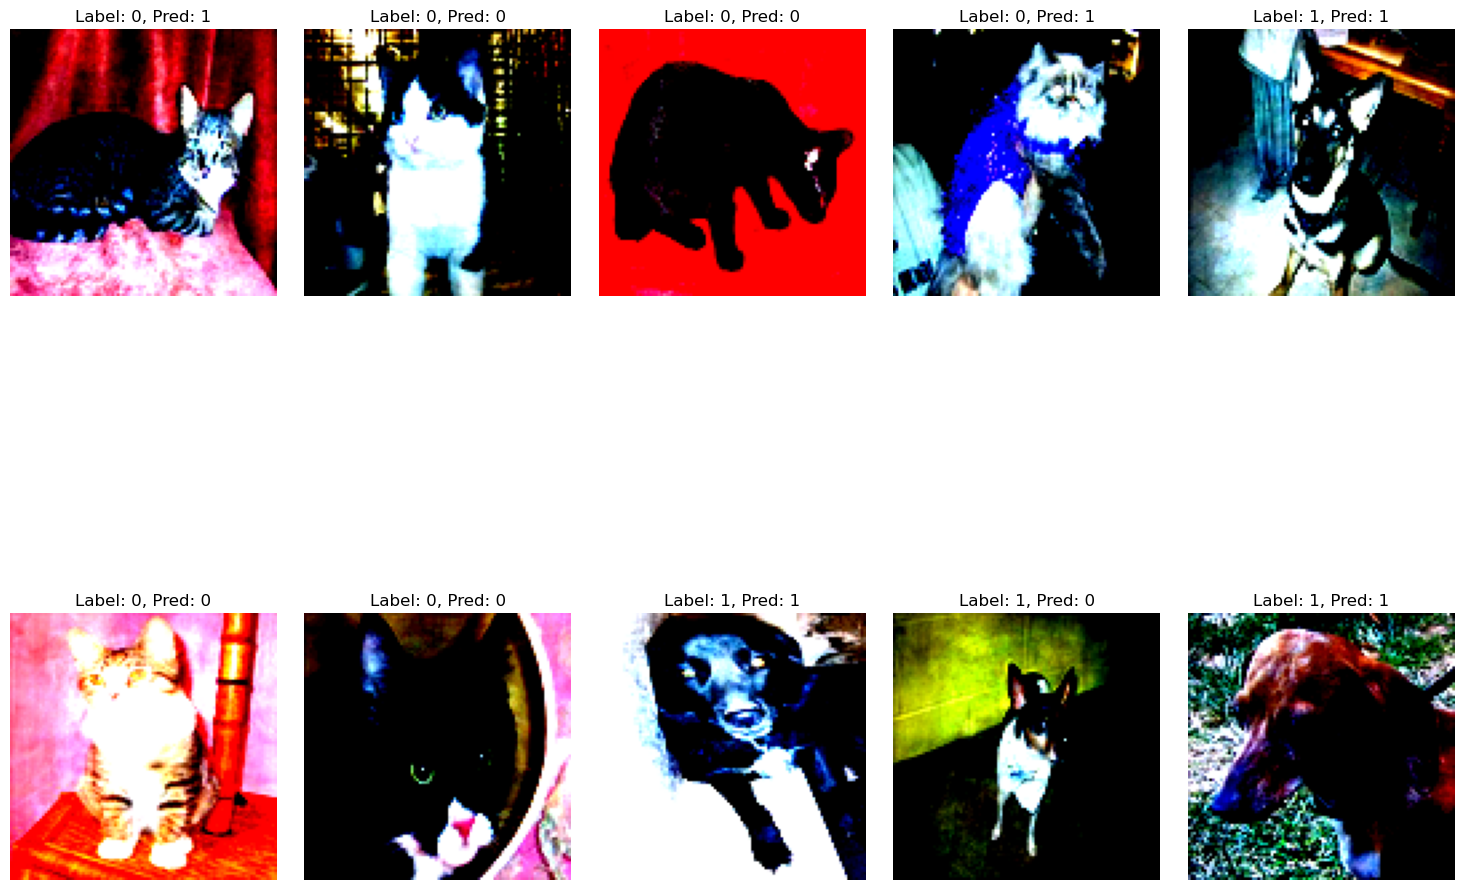

In [1]:
# Import necessary libraries
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

# Constants
IMAGE_SIZE = (100, 100)  # Resize images to this size
DATA_DIR = r"C:\Users\amrut\Downloads\PetImages"  # Replace with your dataset path

# Function to load images and labels with a limit on the number of images
def load_images(data_dir, label, max_images=20):
    images = []
    labels = []
    files = [f for f in os.listdir(data_dir) if f.endswith('.jpg') or f.endswith('.jpeg')]
    for i, filename in tqdm(enumerate(files[:max_images]), total=min(max_images, len(files))):
        # Load image
        image_path = os.path.join(data_dir, filename)
        image = Image.open(image_path).convert('RGB')  # Ensure it's RGB
        image = image.resize(IMAGE_SIZE, Image.Resampling.LANCZOS)  # Use LANCZOS for better quality
        image = np.array(image)  # Convert to numpy array without flattening
        images.append(image)
        labels.append(label)
    return images, labels

# Load a limited number of images from both classes (up to 20 images each)
cats_images, cats_labels = load_images(os.path.join(DATA_DIR, 'Cat'), 0, max_images=20)  # Label 0 for cats
dogs_images, dogs_labels = load_images(os.path.join(DATA_DIR, 'Dog'), 1, max_images=20)  # Label 1 for dogs

# Combine the data
X = np.array(cats_images + dogs_images)
y = np.array(cats_labels + dogs_labels)

# Flatten images for SVM
X_flat = np.array([image.flatten() for image in X])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_classifier = SVC(kernel='linear', random_state=42)  # You can experiment with other kernels like 'rbf' or 'poly'
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Optionally, visualize some test images with their predicted labels
def show_images(images, labels, preds=None, num=10):
    indices = np.random.choice(len(images), num, replace=False)  # Randomly select unique indices
    selected_images = [images[i] for i in indices]
    selected_labels = [labels[i] for i in indices]
    selected_preds = [preds[i] for i in indices] if preds is not None else None

    plt.figure(figsize=(15, 15))  # Adjusted figure size for better spacing
    for i in range(num):
        plt.subplot(2, num//2, i+1)  # Changed layout to 2 rows for better spacing
        plt.imshow(selected_images[i])  # Directly display image array
        title_text = f'Label: {selected_labels[i]}'
        if selected_preds is not None:
            title_text += f', Pred: {selected_preds[i]}'
        plt.title(title_text, fontsize=12)  # Adjusted font size
        plt.axis('off')
    plt.tight_layout(pad=2.0)  # Added padding between subplots
    plt.show()

# Visualize some predictions
show_images(X_test.reshape(-1, *IMAGE_SIZE, 3), y_test, preds=y_pred, num=10)  # Reshape for correct display


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 38.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.50      0.60      0.55         5

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


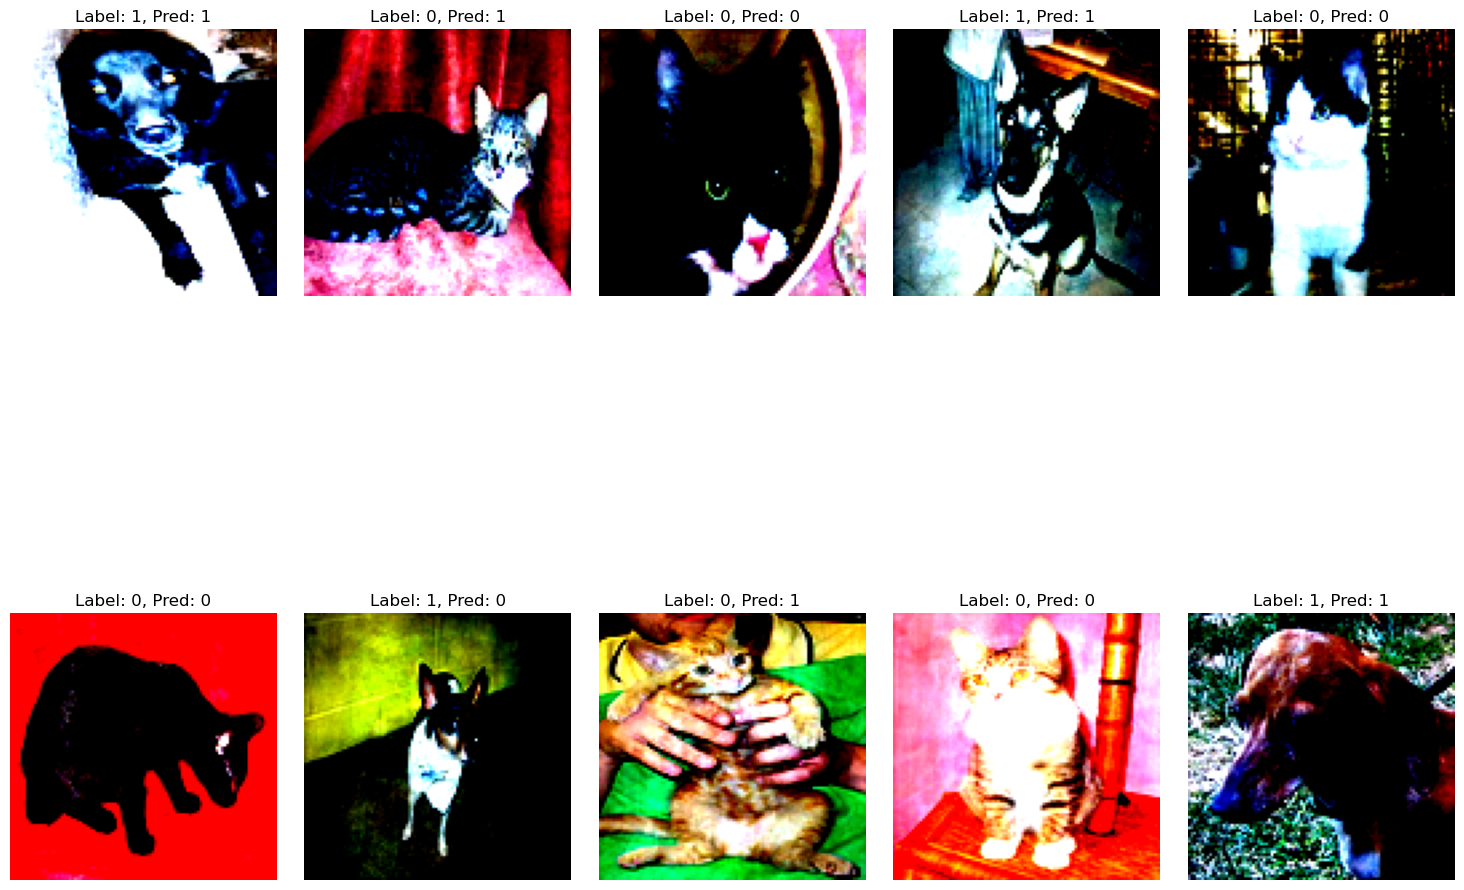

In [2]:
# Import necessary libraries
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

# Constants
IMAGE_SIZE = (100, 100)  # Resize images to this size
DATA_DIR = r"C:\Users\amrut\Downloads\PetImages"  # Replace with your dataset path

# Function to load images and labels with a limit on the number of images
def load_images(data_dir, label, max_images=20):
    images = []
    labels = []
    files = [f for f in os.listdir(data_dir) if f.endswith('.jpg') or f.endswith('.jpeg')]
    for i, filename in tqdm(enumerate(files[:max_images]), total=min(max_images, len(files))):
        # Load image
        image_path = os.path.join(data_dir, filename)
        image = Image.open(image_path).convert('RGB')  # Ensure it's RGB
        image = image.resize(IMAGE_SIZE, Image.Resampling.LANCZOS)  # Use LANCZOS for better quality
        image = np.array(image)  # Convert to numpy array without flattening
        images.append(image)
        labels.append(label)
    return images, labels

# Load a limited number of images from both classes (up to 20 images each)
cats_images, cats_labels = load_images(os.path.join(DATA_DIR, 'Cat'), 0, max_images=20)  # Label 0 for cats
dogs_images, dogs_labels = load_images(os.path.join(DATA_DIR, 'Dog'), 1, max_images=20)  # Label 1 for dogs

# Combine the data
X = np.array(cats_images + dogs_images)
y = np.array(cats_labels + dogs_labels)

# Flatten images for SVM
X_flat = np.array([image.flatten() for image in X])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_classifier = SVC(kernel='linear', random_state=42)  # You can experiment with other kernels like 'rbf' or 'poly'
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Optionally, visualize some test images with their predicted labels
def show_images(images, labels, preds=None, num=10):
    indices = np.random.choice(len(images), num, replace=False)  # Randomly select unique indices
    selected_images = [images[i] for i in indices]
    selected_labels = [labels[i] for i in indices]
    selected_preds = [preds[i] for i in indices] if preds is not None else None

    plt.figure(figsize=(15, 15))  # Adjusted figure size for better spacing
    for i in range(num):
        plt.subplot(2, num//2, i+1)  # Changed layout to 2 rows for better spacing
        plt.imshow(selected_images[i])  # Directly display image array
        title_text = f'Label: {selected_labels[i]}'
        if selected_preds is not None:
            title_text += f', Pred: {selected_preds[i]}'
        plt.title(title_text, fontsize=12)  # Adjusted font size
        plt.axis('off')
    plt.tight_layout(pad=2.0)  # Added padding between subplots
    plt.show()

# Visualize some predictions
show_images(X_test.reshape(-1, *IMAGE_SIZE, 3), y_test, preds=y_pred, num=10)  # Reshape for correct display
